In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

# Importing Data

In [2]:
data = pd.read_csv("clean_data.csv") #importing the cleaned data we formulated in the 'DATA CLEANING' file
data.drop(columns=['Unnamed: 0'], inplace=True)
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,7 Series,2017,52950,Automatic,22000,Petrol,150.0,22.1,6.6,BMW
1,7 Series,2017,57000,Automatic,11297,Petrol,145.0,22.1,6.6,BMW
2,A8,2015,32000,Automatic,30306,Petrol,570.0,25.0,6.3,audi
3,R8,2019,129000,Semi-Auto,4000,Petrol,145.0,21.4,5.2,audi
4,R8,2020,137995,Semi-Auto,70,Petrol,145.0,21.1,5.2,audi
...,...,...,...,...,...,...,...,...,...,...
71365,i3,2017,19300,Automatic,32867,Other,0.0,470.8,0.6,BMW
71366,i3,2017,20000,Automatic,19178,Other,0.0,470.8,0.6,BMW
71367,i3,2017,19500,Automatic,23956,Other,135.0,470.8,0.6,BMW
71368,i3,2016,17000,Automatic,41063,Other,0.0,470.8,0.6,BMW


# Correlation Analysis

We now draw the correlation between the different parameters using the corr() function and plot a correlation heatmap to show the relation more clearly

In [3]:
# Select only numeric columns
data = data.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = data.corr()

# Print the correlation matrix
print(correlation_matrix)

                year     price   mileage       tax       mpg  engineSize
year        1.000000  0.519200 -0.747711  0.242322 -0.162515   -0.027402
price       0.519200  1.000000 -0.426197  0.352872 -0.397124    0.640436
mileage    -0.747711 -0.426197  1.000000 -0.230406  0.204565    0.123194
tax         0.242322  0.352872 -0.230406  1.000000 -0.483653    0.298635
mpg        -0.162515 -0.397124  0.204565 -0.483653  1.000000   -0.299108
engineSize -0.027402  0.640436  0.123194  0.298635 -0.299108    1.000000


# Correlation Observation

From the above correlation observation we can conclude that-
1. year and mileage have a high negative correlation
2. price and year have an average postive correlation but price and engineSize have a higher than average positive correlation
3. price and mileage have an average negative correlation
4. tax has low positive and negative correlations with mileage, price and engineSize

Hence the main features in our model would be year, mileage, and price with focus on some extent on tax, mpg and engineSize.

<Axes: >

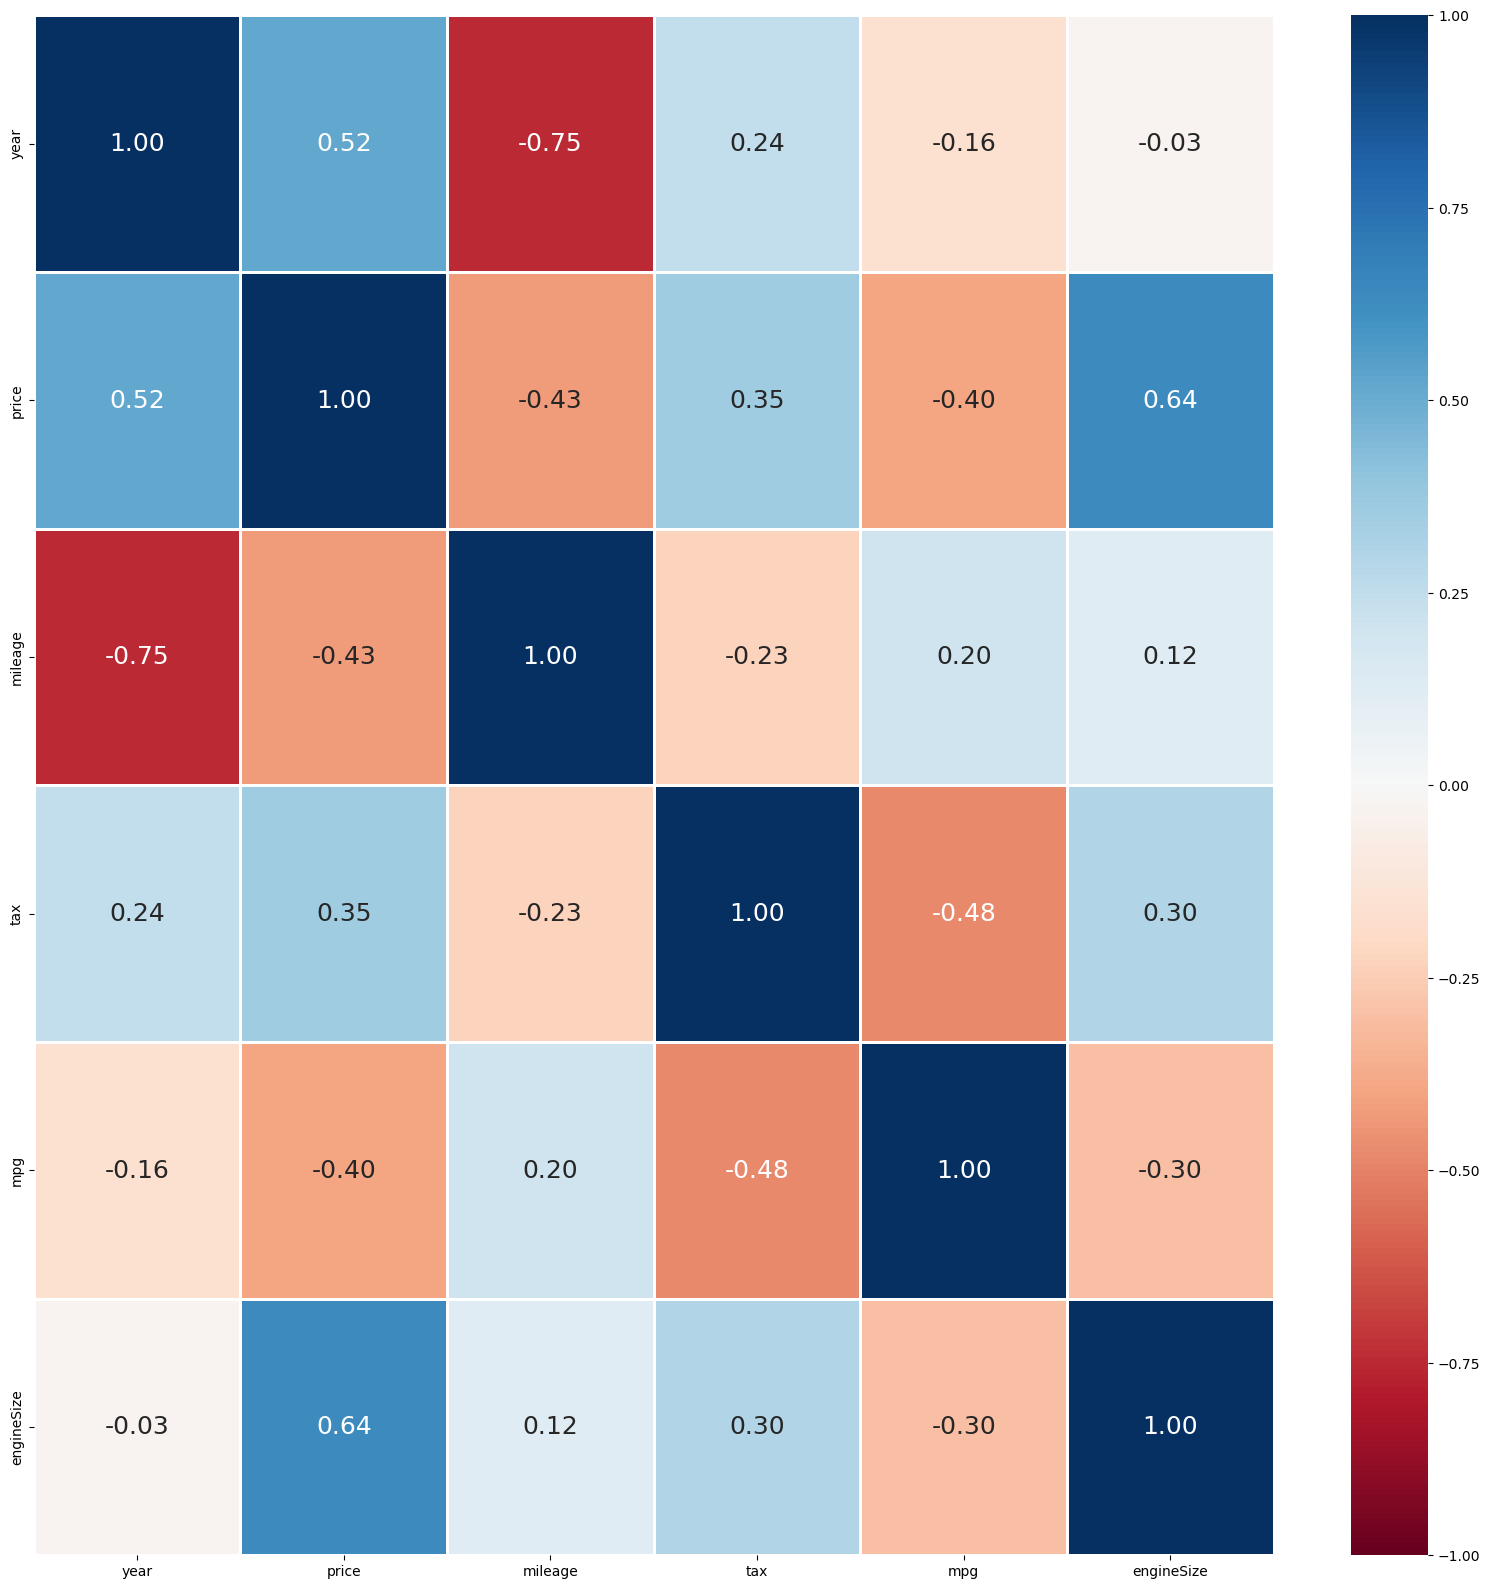

In [4]:
f = plt.figure(figsize=(20, 20))
sb.heatmap(data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

# Pairplot Representation

The pairplot function is typically used to visualize the relationship between multiple variables at once. We have decide to use a pairplot of various numerical parameters with 'year'. The various graphs can provide insights into the data such as the range of years present in the dataset, the most common years, and whether the distribution is skewed towards older or newer years. 

Correlation helped us draw relations between the variables. Now we use pairplot representation to visualise the relation.

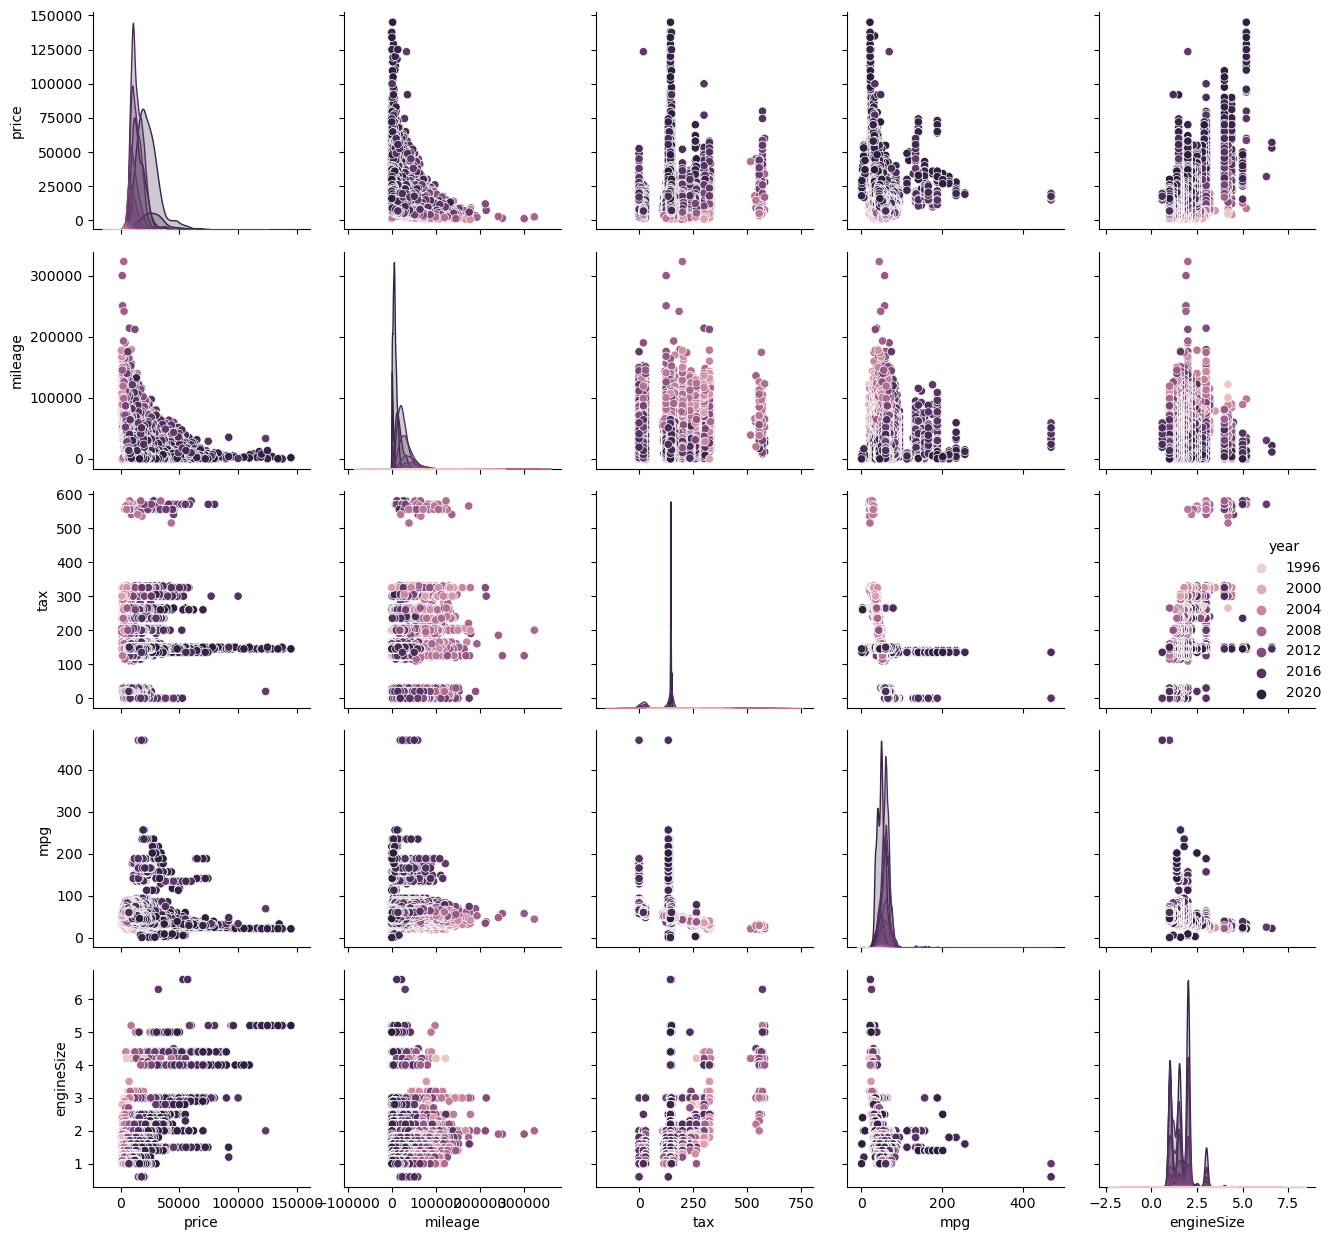

In [5]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sb.pairplot(data, hue="year")
    plt.tight_layout()

## Observations from the Pairplot

1. **Price vs. Mileage**: There's an inverse relationship; as mileage increases, the price tends to decrease. This is a typical pattern since vehicles with higher mileage are generally considered to have more wear and tear and thus are priced lower.
2. **Price vs. Tax**: There isn't a clear linear relationship, but it appears that more expensive vehicles can have a wider range of taxes. The variation in tax could be due to different tax rates applied to vehicles based on factors other than price, such as emissions or vehicle category.


3. **Price vs. MPG**: There isn't a strong linear relationship observable. However, it appears that higher-priced vehicles can vary widely in their miles per gallon (MPG), indicating that fuel efficiency is not directly correlated with the vehicle's price.


4. **Price vs. Engine Size**: There seems to be a positive relationship with a spread of data points. Generally, a larger engine size corresponds to a higher price, possibly due to the association of larger engines with more luxury or performance-oriented vehicles.

5. **Mileage vs. MPG**: There's also no apparent linear relationship. However, it’s common to see more variation in MPG among vehicles with lower mileage, possibly reflecting the wide range of vehicle types in better condition.

6. **Mileage vs. Engine Size**: There is a slight trend where vehicles with higher mileage tend to have smaller engines, which could suggest that vehicles with larger engines are driven less or that smaller engine vehicles last longer.

7. **Tax vs. Engine Size**: A slight positive relationship can be seen where larger engine sizes could result in higher taxes, potentially due to higher emissions.

8. **MPG vs. Engine Size**: There's a negative relationship; larger engines generally result in lower MPG, which is expected as larger engines usually consume more fuel.

## Diagonal (Distribution of Each Variable):
**Price**: Appears to be right-skewed, with a concentration of values at the lower end, indicating most vehicles are in the lower price range.

**Mileage**: Also right-skewed, with more vehicles having lower mileage.

**Tax**: Shows a wide distribution with a peak, suggesting a common tax value, but also a long tail, indicating some vehicles have significantly higher tax rates.

**MPG**: The distribution seems multimodal with several peaks, which could reflect different types of vehicles (e.g., city cars, hybrids, performance vehicles).

**Engine Size**: Appears to be right-skewed with most of the vehicles having smaller engine sizes.

**Hue (Year)**: Newer vehicle models (year) tend to have higher prices, lower mileage, and a wider range of taxes. They also appear to offer a range of MPG values and engine sizes, reflecting the variety of vehicle types available in more recent years.